<a href="https://colab.research.google.com/github/octl/tag_optimization/blob/main/pageSpeedTestAutomator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import required packages 
import json
import requests
import pandas as pd
import urllib
import time
from google.colab import files
import io
import numpy as np
import zipfile

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [13]:
uploaded = pd.read_csv('/content/gdrive/MyDrive/transmit_security/URL_Testing_List.csv')

In [14]:
uploaded.head()
df = uploaded


{'captchaResult': 'CAPTCHA_NOT_NEEDED', 'kind': 'pagespeedonline#result', 'id': 'https://transmit2stg.wpengine.com/', 'loadingExperience': {'initial_url': 'https://transmit2stg.wpengine.com/'}, 'lighthouseResult': {'requestedUrl': 'https://transmit2stg.wpengine.com/', 'finalUrl': 'https://transmit2stg.wpengine.com/', 'lighthouseVersion': '9.6.6', 'userAgent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/106.0.5249.103 Safari/537.36', 'fetchTime': '2023-01-16T22:36:04.490Z', 'environment': {'networkUserAgent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4695.0 Safari/537.36 Chrome-Lighthouse', 'hostUserAgent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/106.0.5249.103 Safari/537.36', 'benchmarkIndex': 1077}, 'runWarnings': [], 'configSettings': {'emulatedFormFactor': 'desktop', 'formFactor': 'desktop', 'locale': 'en-US', 'onlyCategories': ['perform
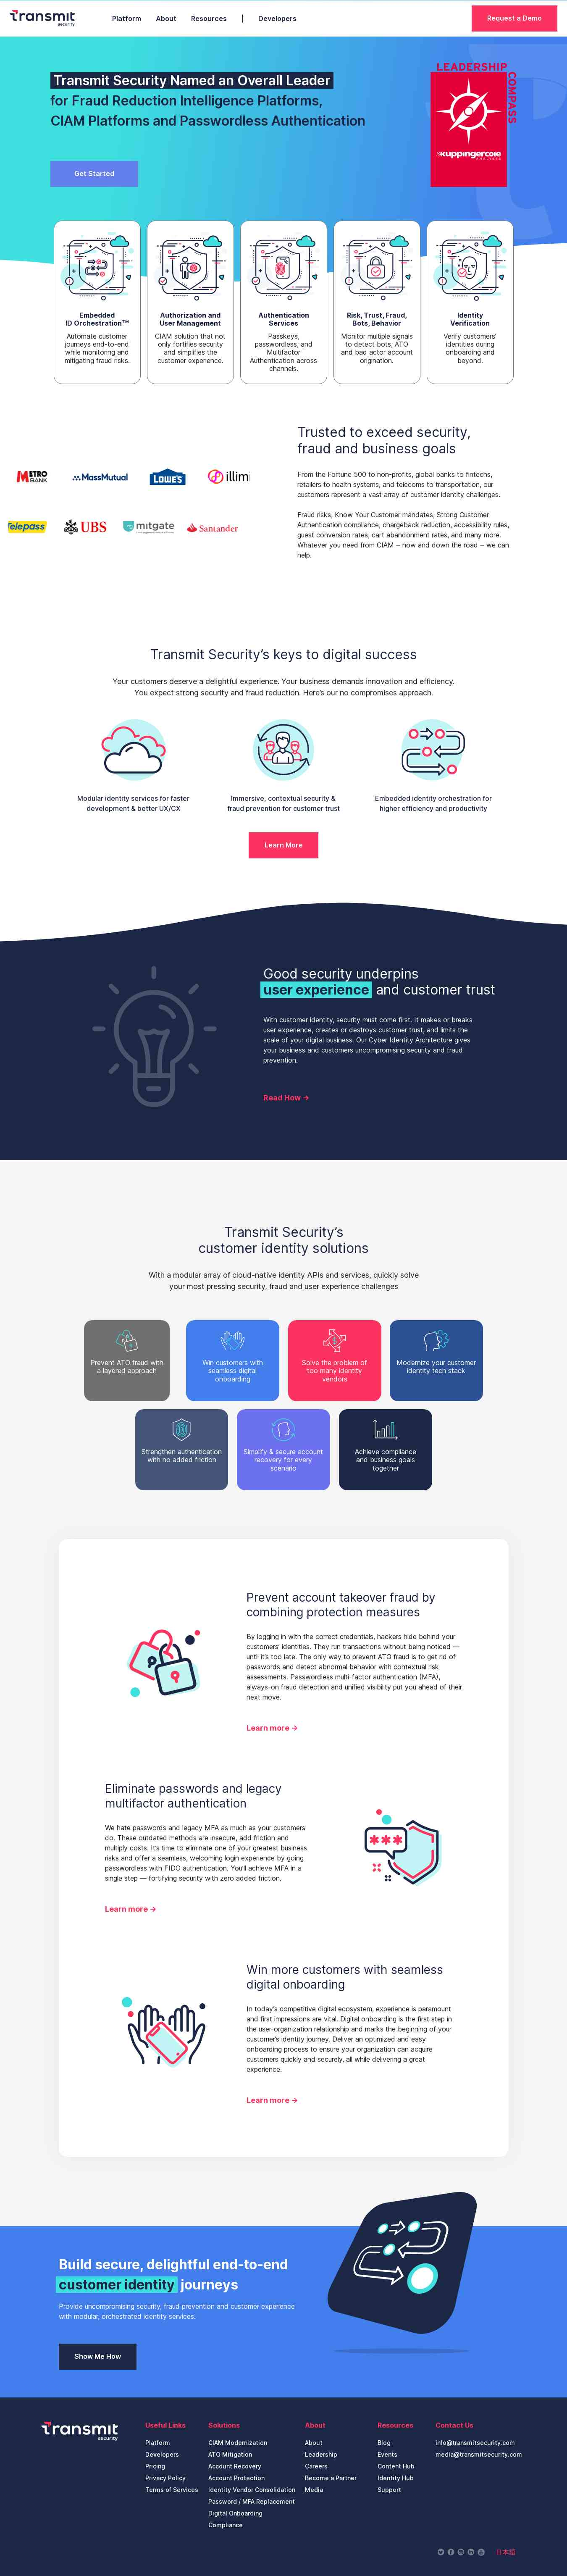
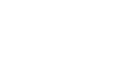
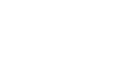
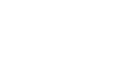
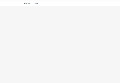
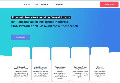
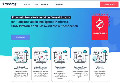
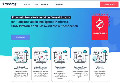
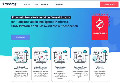
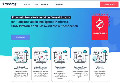
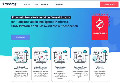
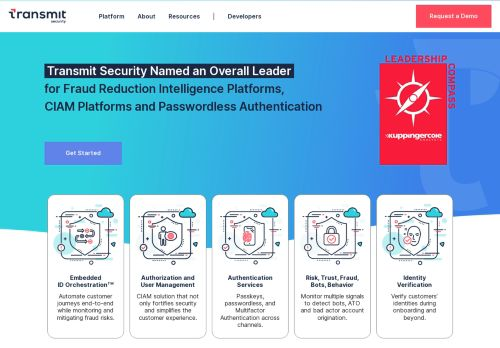
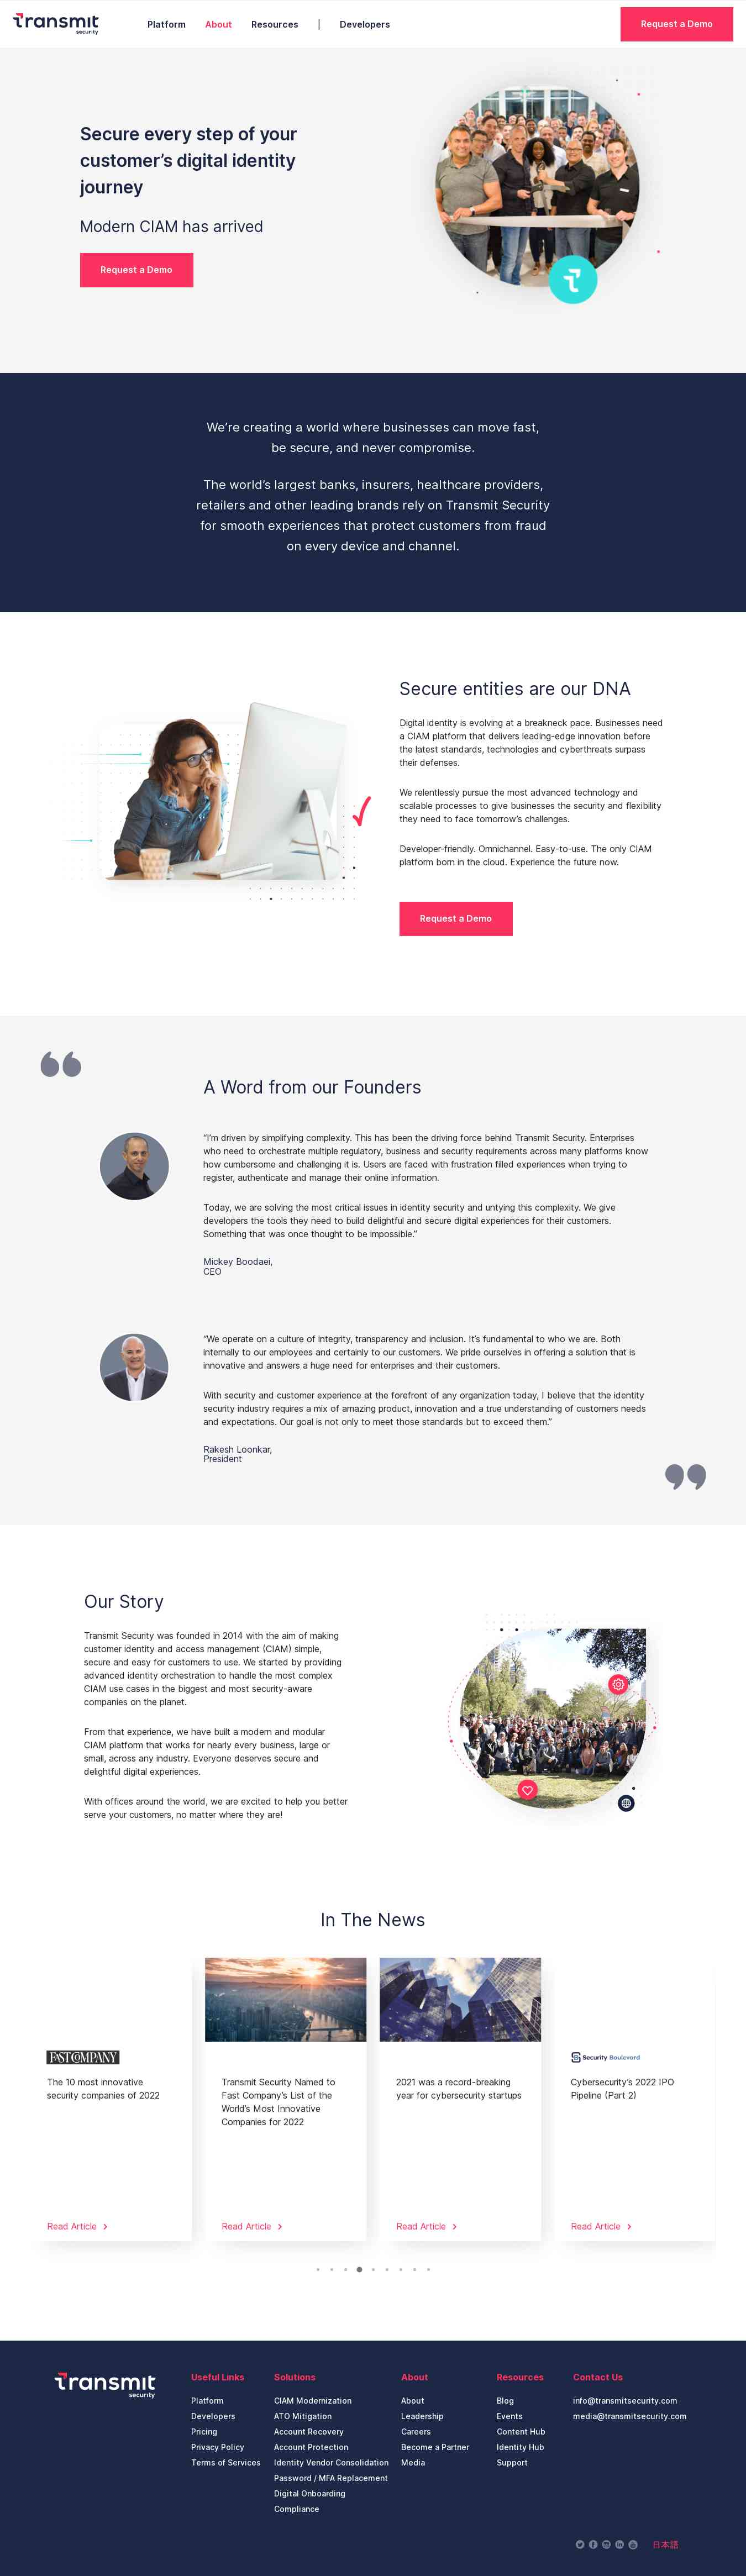
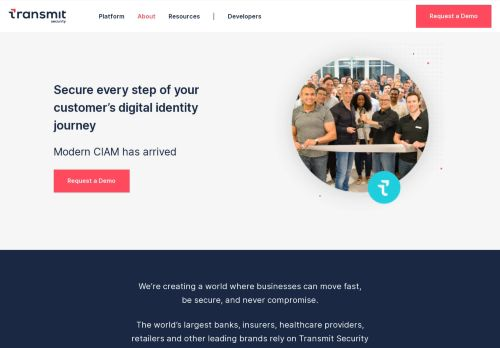
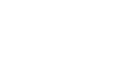
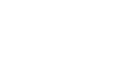
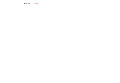
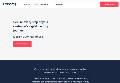
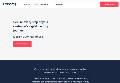
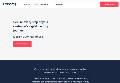
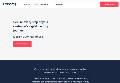
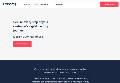
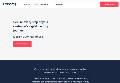
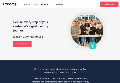
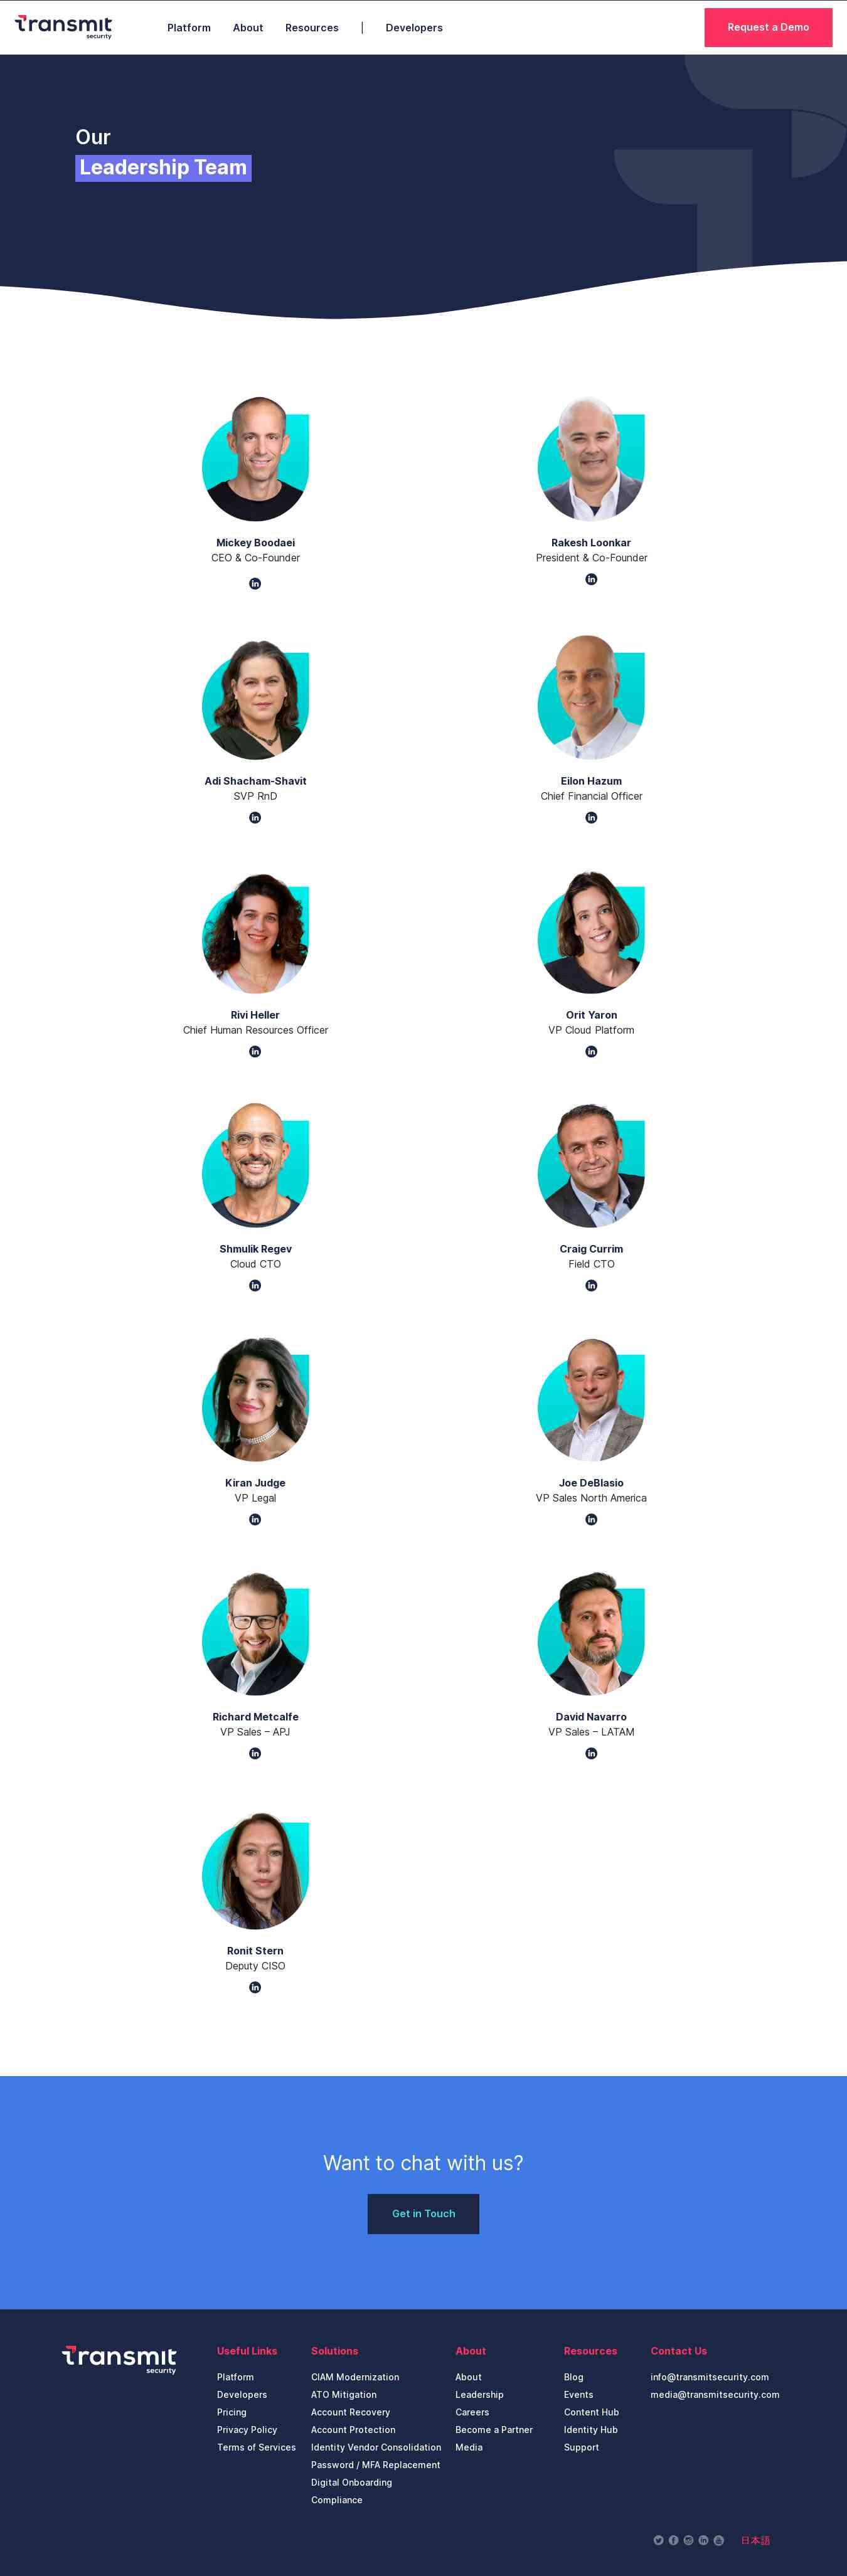
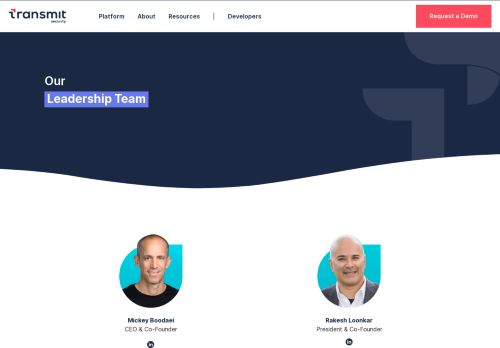
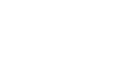
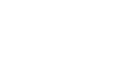
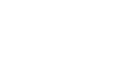
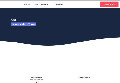
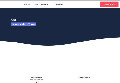
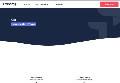
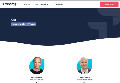
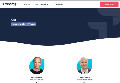
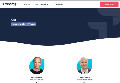
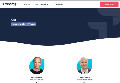
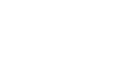
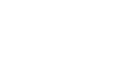
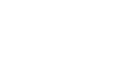
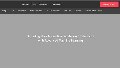
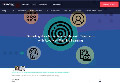
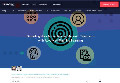
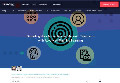
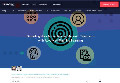
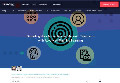
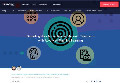
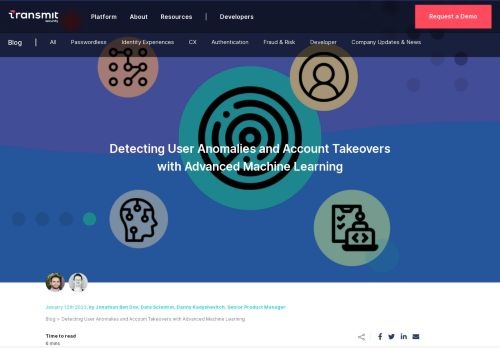
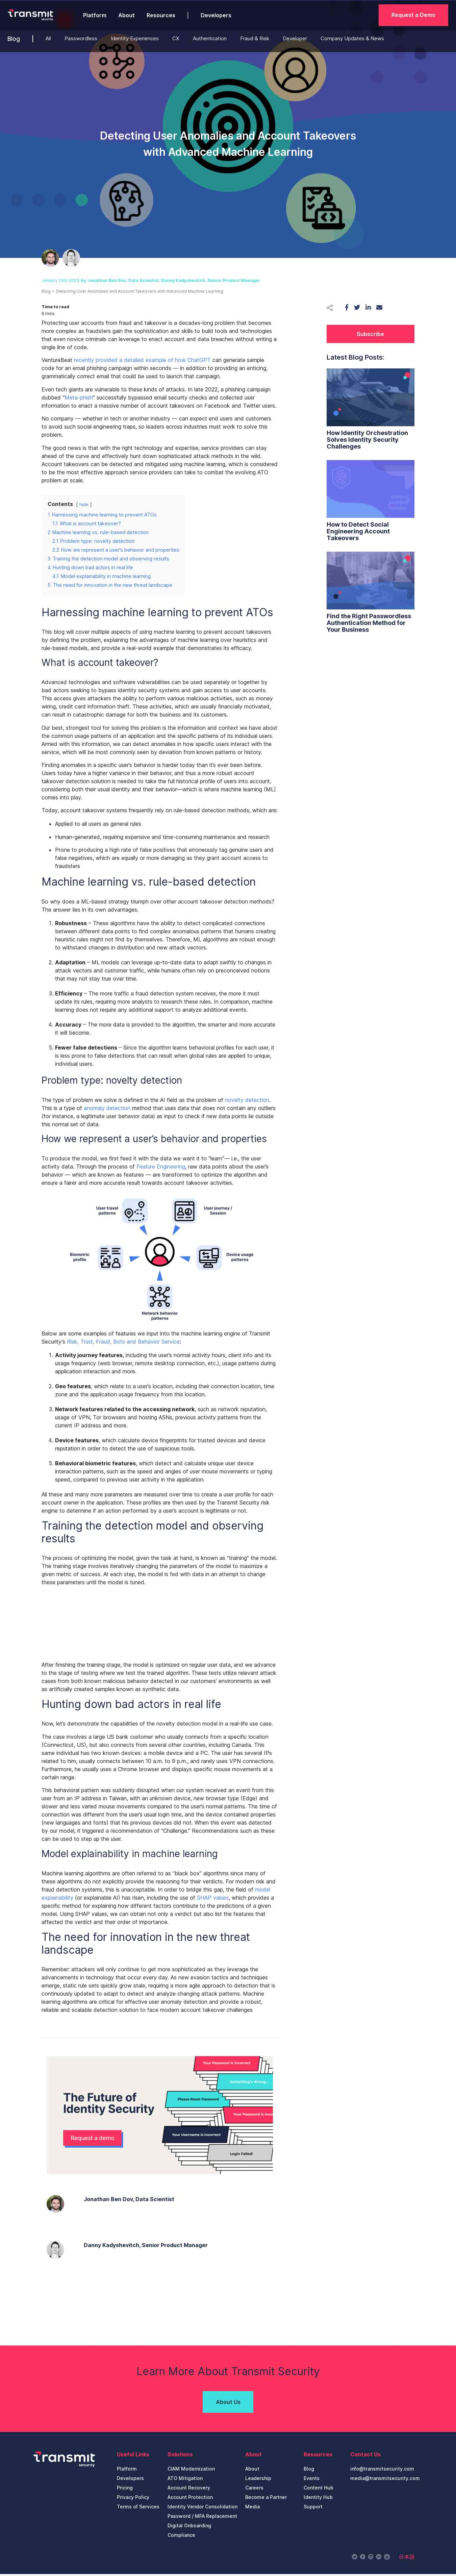
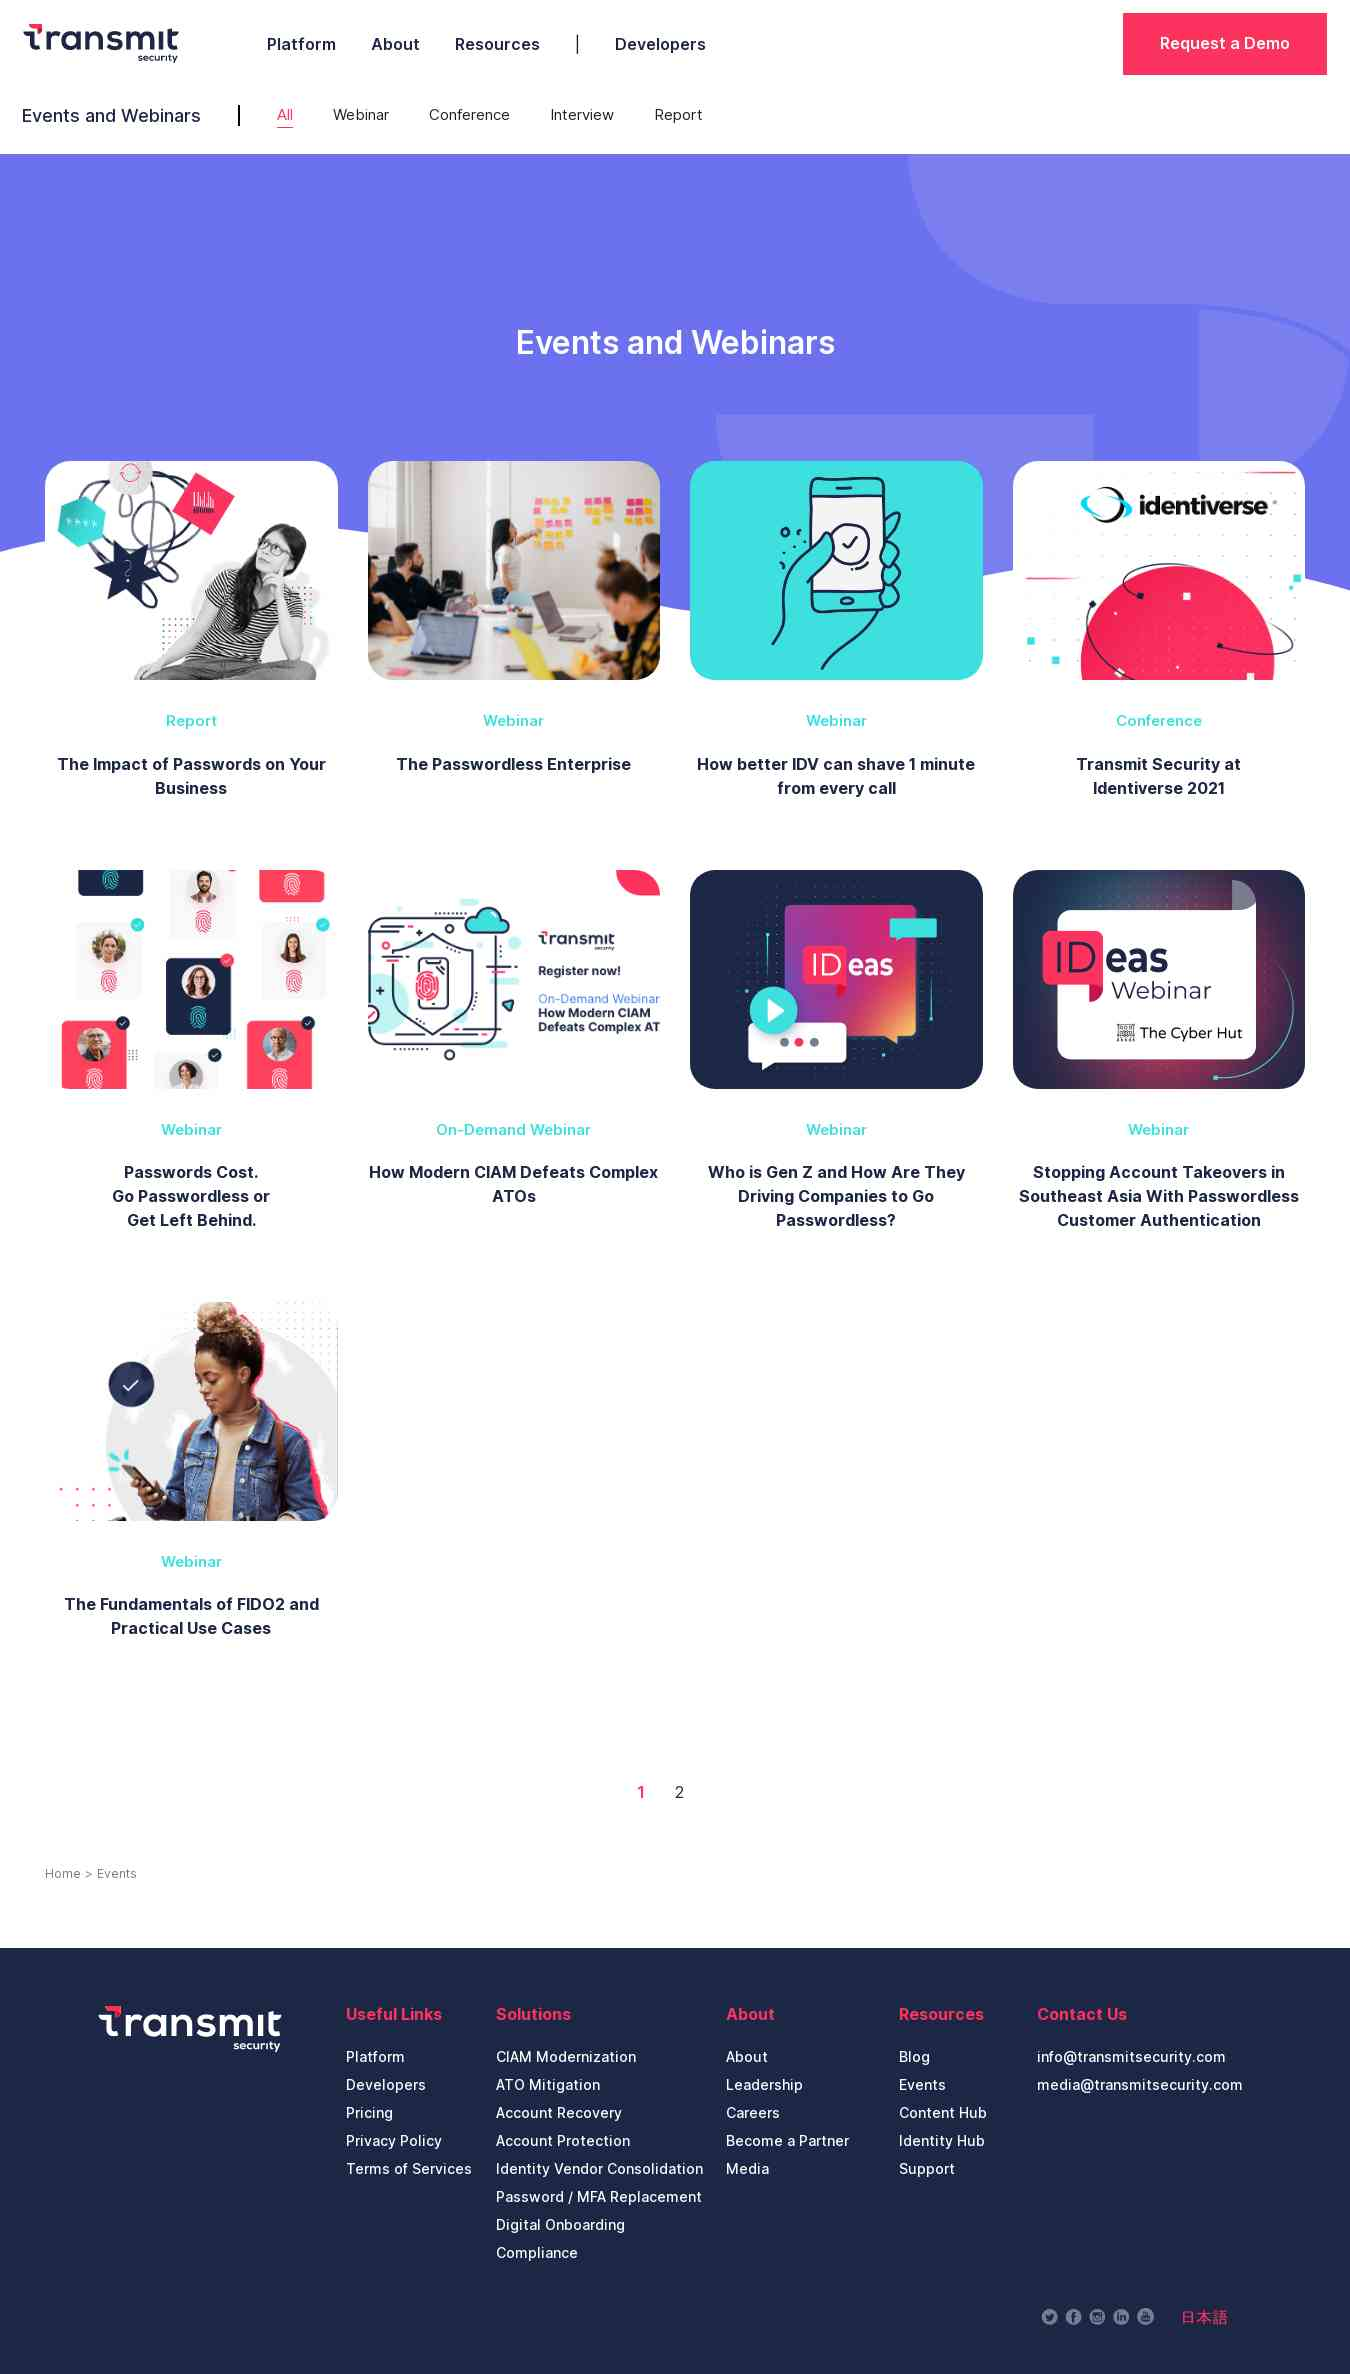
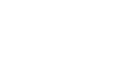
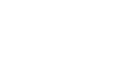
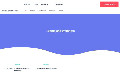
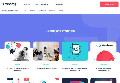
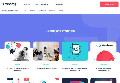
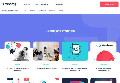
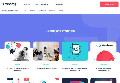
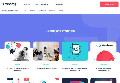
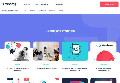
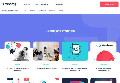
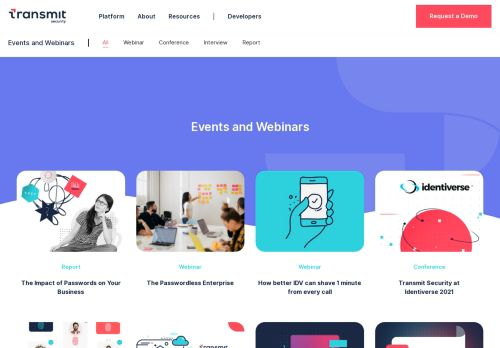
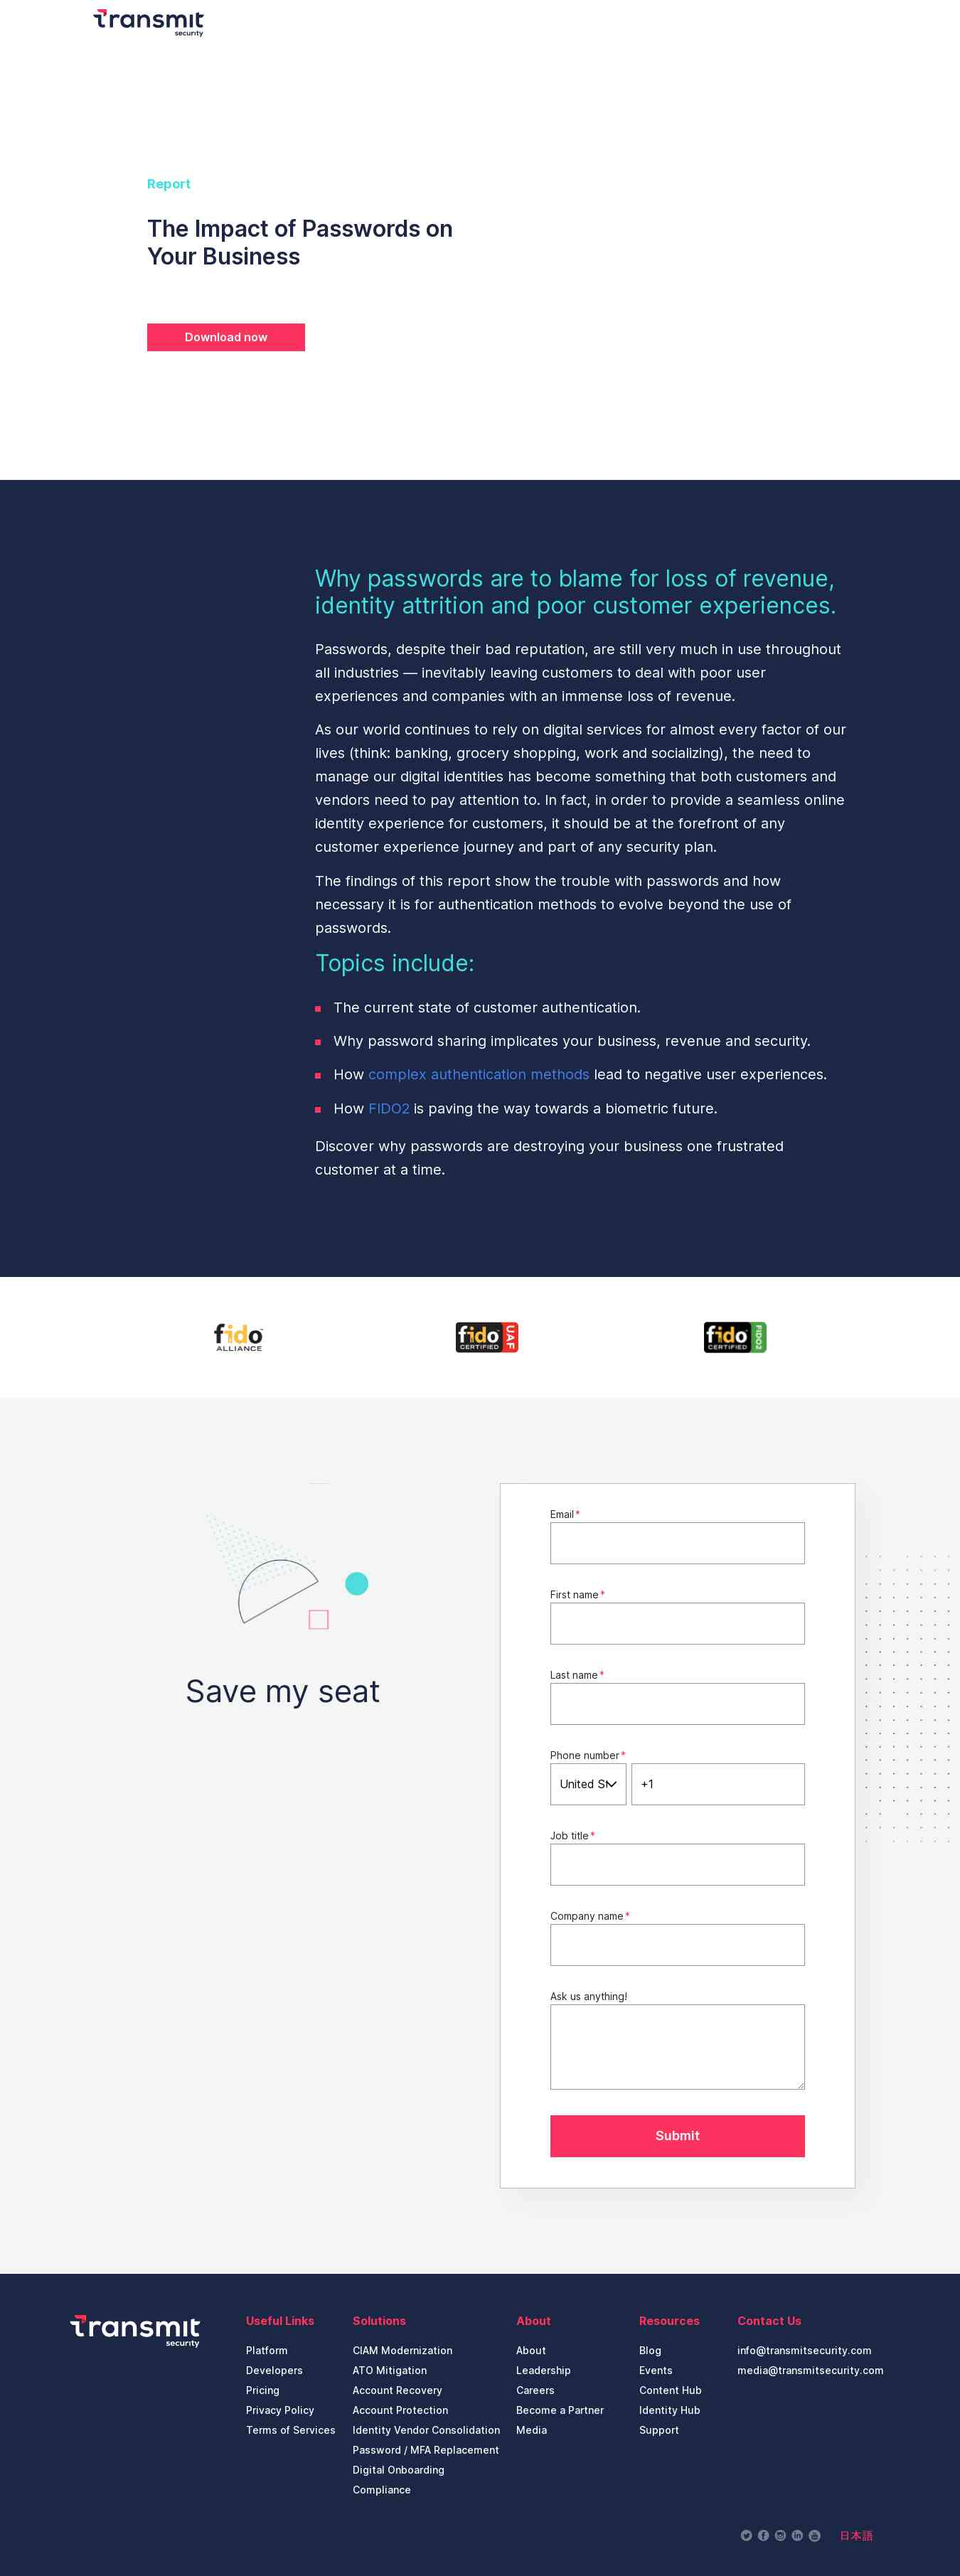
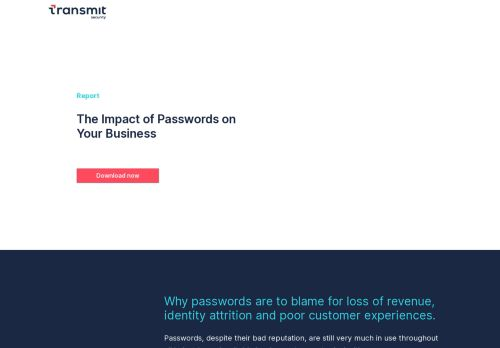
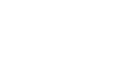
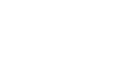
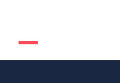
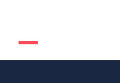
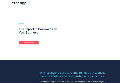
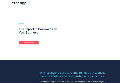
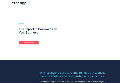
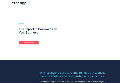
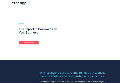
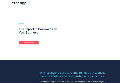

In [15]:
response_object = {}


# Iterate through the df
for x in range(0, len(df)):

        # Define request parameter
        url = df.iloc[x]['url']

        # Make request
        pagespeed_results = urllib.request.urlopen('https://www.googleapis.com/pagespeedonline/v5/runPagespeed?url={}&strategy=desktop'\
            .format(url)).read().decode('UTF-8')

        # Convert to json format
        pagespeed_results_json = json.loads(pagespeed_results)

        # Insert returned json response into response_object
        response_object[url] = pagespeed_results_json
        time.sleep(10)
        
        print(response_object[url])

In [16]:
df_pagespeed_results = pd.DataFrame(columns=['url',
          'Largest_Contentful_Paint',
          'Cumulative_Layout_Shift',
          'First_Contentful_Paint',
          'Time_to_Interactive',
          'Total_Blocking_Time',
          'Speed_Index',
          'Fetch_Time'])  

In [17]:
response_object[url]['lighthouseResult']['fetchTime']

'2023-01-16T22:39:14.476Z'

In [18]:
for (url, x) in zip(
    response_object.keys(),
    range(0, len(response_object))
):

        # URLs
        df_pagespeed_results.loc[x, 'url'] =\
            response_object[url]['lighthouseResult']['finalUrl']


        # Largest Contentful Paint    
        df_pagespeed_results.loc[x, 'Largest_Contentful_Paint'] =\
        response_object[url]['lighthouseResult']['audits']['largest-contentful-paint']['numericValue']
        # Cumulative Layout Shift    
        df_pagespeed_results.loc[x, 'Cumulative_Layout_Shift'] =\
        response_object[url]['lighthouseResult']['audits']['cumulative-layout-shift']['numericValue']
                # First Contentful Paint 
        df_pagespeed_results.loc[x, 'First_Contentful_Paint'] =\
        response_object[url]['lighthouseResult']['audits']['first-contentful-paint']['numericValue']

        # Additional Interactivity Metrics 

        # Time to Interactive  
        df_pagespeed_results.loc[x, 'Time_to_Interactive'] =\
        response_object[url]['lighthouseResult']['audits']['interactive']['numericValue']

        # Total Blocking Time   
        df_pagespeed_results.loc[x, 'Total_Blocking_Time'] =\
        response_object[url]['lighthouseResult']['audits']['total-blocking-time']['numericValue']

        # Speed Index
        df_pagespeed_results.loc[x, 'Speed_Index'] =\
        response_object[url]['lighthouseResult']['audits']['speed-index']['numericValue']

        # Fetch Time
        df_pagespeed_results.loc[x, 'Fetch_Time'] =\
        response_object[url]['lighthouseResult']['fetchTime']

In [19]:
summary = df_pagespeed_results

df_pagespeed_results.head()

,url,Largest_Contentful_Paint,Cumulative_Layout_Shift,First_Contentful_Paint,Time_to_Interactive,Total_Blocking_Time,Speed_Index,Fetch_Time
0,https://transmit2stg.wpengine.com/,1432.5,0.000301,1103,3641.5,88,1966.567296,2023-01-16T22:36:04.490Z
1,https://transmit2stg.wpengine.com/about,4350,0.046676,1178,5461.5,555,2498.023322,2023-01-16T22:36:37.594Z
2,https://transmit2stg.wpengine.com/about/leader...,2850,0.000301,1269,3944,516,2123.264791,2023-01-16T22:37:24.408Z
3,https://transmit2stg.wpengine.com/blog/detecti...,1830,0.002873,1277,3694.5,356.5,2127.590684,2023-01-16T22:38:04.294Z
4,https://transmit2stg.wpengine.com/events,2219,0.000293,1360,3554,84.5,1823.80269,2023-01-16T22:38:39.918Z


In [20]:
df_pagespeed_results.values.tolist()

[['https://transmit2stg.wpengine.com/',
  1432.5,
  0.0003008691226687681,
  1103,
  3641.5,
  88,
  1966.5672962900462,
  '2023-01-16T22:36:04.490Z'],
 ['https://transmit2stg.wpengine.com/about',
  4350,
  0.04667611143945364,
  1178,
  5461.5,
  555,
  2498.023321854028,
  '2023-01-16T22:36:37.594Z'],
 ['https://transmit2stg.wpengine.com/about/leadership',
  2850,
  0.0003008691226687681,
  1269,
  3944,
  516,
  2123.2647905084245,
  '2023-01-16T22:37:24.408Z'],
 ['https://transmit2stg.wpengine.com/blog/detecting-user-anomalies-and-account-takeovers-with-advanced-machine-learning',
  1830,
  0.0028726468785570444,
  1277,
  3694.5,
  356.5,
  2127.590683680543,
  '2023-01-16T22:38:04.294Z'],
 ['https://transmit2stg.wpengine.com/events',
  2219,
  0.00029313271604938275,
  1360,
  3554,
  84.5,
  1823.8026903074083,
  '2023-01-16T22:38:39.918Z'],
 ['https://transmit2stg.wpengine.com/events/the-impact-of-passwords-on-your-business',
  2075,
  0,
  1370,
  3018.5,
  167.5,
  1853.49248

In [21]:
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

from google.colab import auth
auth.authenticate_user()
#current state of gtm
gtm = 'Baseline'
# create, and save df
from gspread_dataframe import set_with_dataframe
title = "Page Speed Test Results - "+ gtm

titles_list = []
for spreadsheet in gc.openall():
    titles_list.append(spreadsheet.title)


if title in titles_list:
    sheet = gc.open(title).sheet1
    data = sheet.get_all_values()
    if len(data) > 1:
        sheet.append_rows(df_pagespeed_results.values.tolist())
    else:
        sheet.append_rows([df_pagespeed_results.columns.values.tolist()] + df_pagespeed_results.values.tolist())
else:
    # create new sheet
    gc.create(title)
    sheet = gc.open(title).sheet1
    sheet.append_rows([df_pagespeed_results.columns.values.tolist()] + df_pagespeed_results.values.tolist())


#sheet.update([df_pagespeed_results.columns.values.tolist()] + df_pagespeed_results.values.tolist())

#set_with_dataframe(sheet, baseline_metrics_pivot) 
# include_index=False, include_column_header=True, resize=False